In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#read csv
df = pd.read_csv('dataset/Data Set (Analisa).csv',delimiter=";")


In [3]:
#show data
df.head()

,CN #,Penerima,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Diskon,Total
0,30071073722,NIMAS AYU,-,TEMENGGUNG RT. 04 RW. 03 NO. 19,AMBARAWA SEMARANG,DOMPET,SPANDUK,"Rp23,000.00",Rp0.00,"Rp23,000.00"
1,30071073723,BPK ANDDREE WIDIHUTOMO,PT STANLEY BLACK & DECKER,JLN PROF DR SATRIO NO 164,JAKARTA - DKI JAKARTA,DOKUMEN,PERIKLANAN,"Rp13,000.00",Rp0.00,"Rp13,000.00"
2,30071073724,MRS DINNA,PT SAMUDERA INDUSTRI,JL TERUSAN KOPO KM 11 NO 76,BANDUNG - JAWA BARAT,DOKUMEN,PERIKLANAN,"Rp20,000.00",Rp0.00,"Rp20,000.00"
3,30071073725,IBU MAYA,PT RAMA INDONESIA,JL DURMAN RUKO NO 24 G BLKNG SMA 4 GARDYATI,BANDUNG,DOKUMEN,PERIKLANAN,"Rp14,000.00",Rp0.00,"Rp14,000.00"
4,30071073726,ANSORI,BAROKAH FOTO COPY,JLN TEUKU UMAR NO 20 RT 4/8,TANGERANG - BANTEN,BAWANG GORENG,SPANDUK,"Rp14,000.00",Rp0.00,"Rp14,000.00"


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 10 columns):
CN #           2148 non-null int64
Penerima       2148 non-null object
Perusahaan     1443 non-null object
Alamat         2148 non-null object
Wilayah        2148 non-null object
Isi Kiriman    2148 non-null object
SP             2148 non-null object
Biaya Kirim    2148 non-null object
Diskon         2148 non-null object
Total          2148 non-null object
dtypes: int64(1), object(9)
memory usage: 167.9+ KB


In [5]:
df.Perusahaan.fillna('Pribadi',inplace = True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 10 columns):
CN #           2148 non-null int64
Penerima       2148 non-null object
Perusahaan     2148 non-null object
Alamat         2148 non-null object
Wilayah        2148 non-null object
Isi Kiriman    2148 non-null object
SP             2148 non-null object
Biaya Kirim    2148 non-null object
Diskon         2148 non-null object
Total          2148 non-null object
dtypes: int64(1), object(9)
memory usage: 167.9+ KB


In [7]:
df['Total']=(df['Total'].replace( '[Rp,)]','', regex=True ) .replace( '[(]','-',   regex=True ).astype(float))

In [8]:
df.head()

,CN #,Penerima,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Diskon,Total
0,30071073722,NIMAS AYU,-,TEMENGGUNG RT. 04 RW. 03 NO. 19,AMBARAWA SEMARANG,DOMPET,SPANDUK,"Rp23,000.00",Rp0.00,23000.0
1,30071073723,BPK ANDDREE WIDIHUTOMO,PT STANLEY BLACK & DECKER,JLN PROF DR SATRIO NO 164,JAKARTA - DKI JAKARTA,DOKUMEN,PERIKLANAN,"Rp13,000.00",Rp0.00,13000.0
2,30071073724,MRS DINNA,PT SAMUDERA INDUSTRI,JL TERUSAN KOPO KM 11 NO 76,BANDUNG - JAWA BARAT,DOKUMEN,PERIKLANAN,"Rp20,000.00",Rp0.00,20000.0
3,30071073725,IBU MAYA,PT RAMA INDONESIA,JL DURMAN RUKO NO 24 G BLKNG SMA 4 GARDYATI,BANDUNG,DOKUMEN,PERIKLANAN,"Rp14,000.00",Rp0.00,14000.0
4,30071073726,ANSORI,BAROKAH FOTO COPY,JLN TEUKU UMAR NO 20 RT 4/8,TANGERANG - BANTEN,BAWANG GORENG,SPANDUK,"Rp14,000.00",Rp0.00,14000.0


In [197]:
df['Biaya Kirim']=(df['Biaya Kirim'].replace( '[Rp,)]','', regex=True ) .replace( '[(]','-',   regex=True ).astype(float))

In [10]:
df.head()

,CN #,Penerima,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Diskon,Total
0,30071073722,NIMAS AYU,-,TEMENGGUNG RT. 04 RW. 03 NO. 19,AMBARAWA SEMARANG,DOMPET,SPANDUK,23000.0,Rp0.00,23000.0
1,30071073723,BPK ANDDREE WIDIHUTOMO,PT STANLEY BLACK & DECKER,JLN PROF DR SATRIO NO 164,JAKARTA - DKI JAKARTA,DOKUMEN,PERIKLANAN,13000.0,Rp0.00,13000.0
2,30071073724,MRS DINNA,PT SAMUDERA INDUSTRI,JL TERUSAN KOPO KM 11 NO 76,BANDUNG - JAWA BARAT,DOKUMEN,PERIKLANAN,20000.0,Rp0.00,20000.0
3,30071073725,IBU MAYA,PT RAMA INDONESIA,JL DURMAN RUKO NO 24 G BLKNG SMA 4 GARDYATI,BANDUNG,DOKUMEN,PERIKLANAN,14000.0,Rp0.00,14000.0
4,30071073726,ANSORI,BAROKAH FOTO COPY,JLN TEUKU UMAR NO 20 RT 4/8,TANGERANG - BANTEN,BAWANG GORENG,SPANDUK,14000.0,Rp0.00,14000.0


In [11]:
df['Perusahaan'].unique()

array(['-', 'PT STANLEY BLACK & DECKER', 'PT SAMUDERA INDUSTRI',
       'PT RAMA INDONESIA', 'BAROKAH FOTO COPY',
       'PESANTREN MODERN DAARUL MUTTAQIEN', 'Pribadi', 'PT PUTRA SEJATI',
       'PERGUDANGAN KAMAL INDAH BLOK DI', 'PT. ALTA NIKINDO ',
       'JL. LINGKUNGAN III NO. 48 RT. 12/03',
       'DAN + DAN VILLA REGENCY TANGERANG II BLOK DBOI / 54',
       'KANTOR ASPARINDO GEDUNG BANK MEGA', 'KONTRAKAN IBU HJ. MURNI',
       'PT. NOK INDONESIA', 'PT. KALBE FARMA TBK',
       'KAWS. INDUSTRI MITRA KARAWANG ',
       'PERUMAHAN GRIYA SURADITA INDAH (KOPRI)',
       'PT TAMAN SAFARI INDONESIA', '=', 'RS MITRA KELUARGA BEKASI TIMUR',
       'PT KENARI DJADJA PRIMA ', 'PESANTREN MODERN DAARUL MUTTAQIEN 1',
       'PT SUMBER SINAR SEMESTA', "PONPES IAMAM SAFI'I BREBES",
       'PT AKS PRECISION BALL INDONESIA',
       'GG. CIPINANG KEBEMBEM II RT. 10 RW. 13 NO. 30A',
       'PERTOKOAN NIAGA DEWA RUCI BLOK B NO 9', 'KOMPLEK GRIYA BANDUNG',
       'TOKO VIA', 'PT. PRISKILA PRIMA MAKMUR

In [155]:
df.loc[df['Perusahaan'].str.contains(' '), 'Perusahaan'] = 'Pribadi'

In [172]:
df.loc[df['Perusahaan'].str.contains('Perusahaan'), 'Perusahaan'] = 'Usaha/Kantor'

In [173]:
df['Perusahaan'].unique()

array(['Pribadi', 'Usaha/Kantor'], dtype=object)

In [174]:
df.nunique()

CN #           2048
Penerima       1566
Perusahaan        2
Alamat         1635
Wilayah         194
Isi Kiriman     394
SP                4
Biaya Kirim     108
Diskon            1
Total           159
dtype: int64

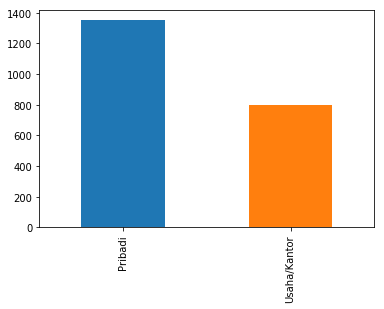

In [175]:
df['Perusahaan'].value_counts().sort_values(ascending=False)[:35].plot.bar()

In [176]:
df.head()

,CN #,Penerima,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Diskon,Total
0,30071073722,NIMAS AYU,Pribadi,TEMENGGUNG RT. 04 RW. 03 NO. 19,AMBARAWA SEMARANG,DOMPET,SPANDUK,23000.0,Rp0.00,23000.0
1,30071073723,BPK ANDDREE WIDIHUTOMO,Usaha/Kantor,JLN PROF DR SATRIO NO 164,JAKARTA - DKI JAKARTA,DOKUMEN,PERIKLANAN,13000.0,Rp0.00,13000.0
2,30071073724,MRS DINNA,Usaha/Kantor,JL TERUSAN KOPO KM 11 NO 76,BANDUNG - JAWA BARAT,DOKUMEN,PERIKLANAN,20000.0,Rp0.00,20000.0
3,30071073725,IBU MAYA,Usaha/Kantor,JL DURMAN RUKO NO 24 G BLKNG SMA 4 GARDYATI,BANDUNG,DOKUMEN,PERIKLANAN,14000.0,Rp0.00,14000.0
4,30071073726,ANSORI,Usaha/Kantor,JLN TEUKU UMAR NO 20 RT 4/8,TANGERANG - BANTEN,BAWANG GORENG,SPANDUK,14000.0,Rp0.00,14000.0


In [199]:
df = df.drop('Diskon', 1)

In [200]:
df.head()

,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Total
0,Pribadi,TEMENGGUNG RT. 04 RW. 03 NO. 19,AMBARAWA SEMARANG,DOMPET,SPANDUK,23000.0,23000.0
1,Usaha/Kantor,JLN PROF DR SATRIO NO 164,JAKARTA - DKI JAKARTA,DOKUMEN,PERIKLANAN,13000.0,13000.0
2,Usaha/Kantor,JL TERUSAN KOPO KM 11 NO 76,BANDUNG - JAWA BARAT,DOKUMEN,PERIKLANAN,20000.0,20000.0
3,Usaha/Kantor,JL DURMAN RUKO NO 24 G BLKNG SMA 4 GARDYATI,BANDUNG,DOKUMEN,PERIKLANAN,14000.0,14000.0
4,Usaha/Kantor,JLN TEUKU UMAR NO 20 RT 4/8,TANGERANG - BANTEN,BAWANG GORENG,SPANDUK,14000.0,14000.0


In [201]:
df['Isi Kiriman'].unique()

array(['DOMPET', 'DOKUMEN', 'BAWANG GORENG', 'SIWANG', 'SANDAL',
       'STNK MOTOR', 'KERUPUK MENTAH', 'BATIK', 'ACCESORIES',
       'MAKANAN PAKAIAN', 'BUKU FILE', 'CREAM COSMETIK', 'SUMPIT',
       'TERASI', 'MAKANAN RINGAN', 'CELANA', 'PEPAYA', 'KERUPUK',
       'KARTU P?DANA', 'PAKAIAN/HIJAB',
       'STNK MOTOR SURAT KET DAN ACCESORIES', 'SAMPLE ANYAMAN',
       'MUTASI KENDARAAN BPKB & STNK MOBIL', 'SAMPLE ROTTAN', 'SEPATU',
       'BAJU', 'SAMPEL ALUMUNIUM', 'MAKANAN', 'PAKAIAN',
       'MAINAN ANAK (REPLIKA SENJATA)', 'KAIN', 'BEDAK', 'KAOS',
       'SEPATU KULIT', 'ACCESORIES GELANG TASBIH',
       'SAMPEL RATTAN PLASTIK', 'BAWANG GORENGG', 'PAKAIAN HIJAH',
       'PAKAIAN HIJAB', 'PAKAIANN HIJAB', 'PAKAIN HIJAB',
       'SPAREPAT MOTOR', 'TAS', 'SAMPEL PLASTIK', 'BUKU AGENDA',
       'BUAH MANGGA ', 'PARFUM', 'BESI', 'SAMPLE KAYU', 'STNK  MOBIL',
       'KAIN BATIK', 'KOSMETIK (BODY SPA)', 'TIMBANGAN GANTUNG',
       'ASESORIS BROS DLL', 'SEMPLE KAYU', 'PERLENGKAPAN BAYI',
 

In [354]:
df.loc[df['Isi Kiriman'].str.contains('SERTIFIKAT'), 'Isi Kiriman'] = 'Dokumen'

In [392]:
df.loc[df['Isi Kiriman'].str.contains('TUPAR'), 'Isi Kiriman'] = 'Paket'

In [419]:
df['Isi Kiriman'].unique()

array(['Dokumen', 'Paket'], dtype=object)

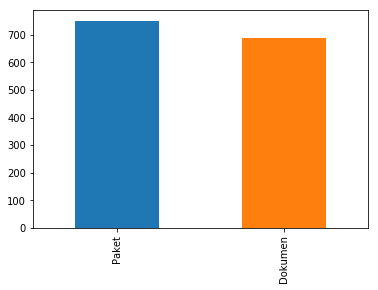

In [418]:
df['Isi Kiriman'].value_counts().sort_values(ascending=False)[:35].plot.bar()

In [420]:
df.head()

,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Total
1,Usaha/Kantor,JLN PROF DR SATRIO NO 164,JAKARTA - DKI JAKARTA,Dokumen,PERIKLANAN,13000.0,13000.0
3,Usaha/Kantor,JL DURMAN RUKO NO 24 G BLKNG SMA 4 GARDYATI,BANDUNG,Dokumen,PERIKLANAN,14000.0,14000.0
4,Usaha/Kantor,JLN TEUKU UMAR NO 20 RT 4/8,TANGERANG - BANTEN,Paket,SPANDUK,14000.0,14000.0
5,Usaha/Kantor,JLN RAYA MAUK KM 7 CADAS,TANGERANG - BANTEN,Paket,PROMO,14000.0,14000.0
7,Usaha/Kantor,JLN WARUNG JATI BARAT NO 22A,JAKARTA - DKI JAKARTA,Paket,PERIKLANAN,13000.0,13000.0


In [422]:
df1['Wilayah'].unique()

array(['JAKARTA - DKI JAKARTA', 'BANDUNG', 'TANGERANG - BANTEN',
       'JAKARTA', 'CIKARANG SELATAN (BKI)', 'TANGERANG',
       'KOTABARU - KALIMANTAN SELATAN', 'BEKASI', 'CIKARANG BARAT (BKI)',
       'BADUNG BALI', 'SAMARINDA', 'SEMARANG', 'PASURUAN - JAWA TIMUR',
       'TANGERANG SELATAN - BANTEN', 'PASAR KEMIS TGR',
       'SURABAYA - JAWA TIMUR', 'DARMASRAYA - SUMATERA BARAT', 'DEPOK',
       'JOHAN PAHLAWAN ACEH BARAT', 'CIBITUNG (BKI)', 'TEGAL', 'SURABAYA',
       'BADUNG - BALI', 'BOGOR', 'PEKALONGAN',
       'TOBA SAMOSIR - SUMATERA UTARA', 'TAHUNAN JEPARA',
       'SERANG - BANTEN', 'PANDAAN PASURUAN',
       'SLEMAN - DAERAH ISTIMEWA YOGYAKARTA',
       'BANYUASIN - SUMATERA SELATAN', 'MEDAN - SUMATERA UTARA',
       'CURUG TGR', 'AKABILURU LIMA PULUH KOTO', 'WONOKERTO PKL',
       'PALEMBANG - SUMATERA SELATAN',
       'BANDA ACEH - NANGROE ACEH DARUSSALAM', 'CIKARANG UTARA (BKI)',
       'BANTUL - DAERAH ISTIMEWA YOGYAKARTA',
       'YOGYAKARTA - DAERAH ISTIMEWA YOGYAKAR

In [615]:
df.loc[df['Wilayah'].str.contains('PAYAKUMBUH'), 'Wilayah'] = 'Sumatra Barat'

In [616]:
df['Wilayah'].unique()

array(['Jakarta', 'Jawa Barat', 'Banten', 'Kalimantan Selatan', 'Bali',
       'Kalimantan Timur', 'Jawa Tengah', 'Jawa Timur', 'Sumatra Barat',
       'Aceh Barat', 'Sumatra Utara', 'DIY', 'Sumatra Selatan', 'NAD',
       'Riau', 'Papua Barat', 'Sulawesi Selatan', 'Kalimantan Barat',
       'Sulawesi Utara', 'Kalimantan Utara', 'Kalimantan Tengah',
       'Kepulauan Bangka Belitung', 'Bengkulu', 'Papua', 'Kepulauan Riau',
       'Sulawesi Tengah', 'Jambi', 'NTB', 'Lampung'], dtype=object)

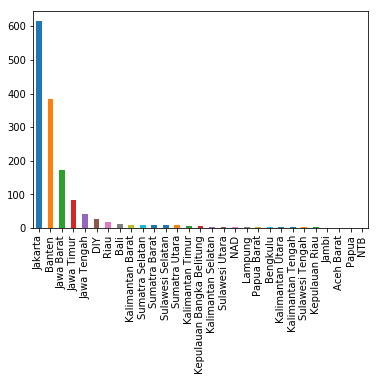

In [618]:
df['Wilayah'].value_counts().sort_values(ascending=False)[:].plot.bar()

In [619]:
df1 = df

In [620]:
df1.head()

,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Total
1,Usaha/Kantor,JLN PROF DR SATRIO NO 164,Jakarta,Dokumen,PERIKLANAN,13000.0,13000.0
3,Usaha/Kantor,JL DURMAN RUKO NO 24 G BLKNG SMA 4 GARDYATI,Jawa Barat,Dokumen,PERIKLANAN,14000.0,14000.0
4,Usaha/Kantor,JLN TEUKU UMAR NO 20 RT 4/8,Banten,Paket,SPANDUK,14000.0,14000.0
5,Usaha/Kantor,JLN RAYA MAUK KM 7 CADAS,Banten,Paket,PROMO,14000.0,14000.0
7,Usaha/Kantor,JLN WARUNG JATI BARAT NO 22A,Jakarta,Paket,PERIKLANAN,13000.0,13000.0


In [622]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 1 to 2147
Data columns (total 7 columns):
Perusahaan     1439 non-null object
Alamat         1439 non-null object
Wilayah        1439 non-null object
Isi Kiriman    1439 non-null object
SP             1439 non-null object
Biaya Kirim    1439 non-null float64
Total          1439 non-null float64
dtypes: float64(2), object(5)
memory usage: 89.9+ KB


In [625]:
def enum(df,x):
    df[x]=df[x].astype('category')
    df[x]=pd.factorize(df[x])[0]
    
enum(df1,'Perusahaan')
enum(df1,'Alamat')
enum(df1,'Wilayah')
enum(df1,'Isi Kiriman')

In [627]:
df1.head()

,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Total
1,0,0,0,0,PERIKLANAN,13000.0,13000.0
3,0,1,1,0,PERIKLANAN,14000.0,14000.0
4,0,2,2,1,SPANDUK,14000.0,14000.0
5,0,3,2,1,PROMO,14000.0,14000.0
7,0,4,0,1,PERIKLANAN,13000.0,13000.0


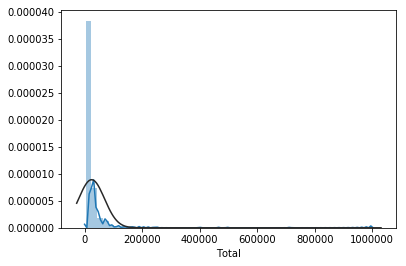

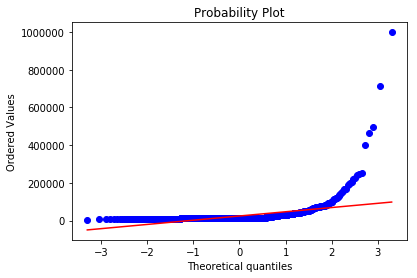

In [628]:
#histogram and normal probability plot
sns.distplot(df1['Total'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['Total'], plot=plt)

In [629]:
df1 = df1.drop(df1[df1['Total'] > 100000].index)

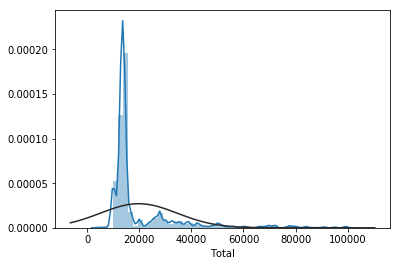

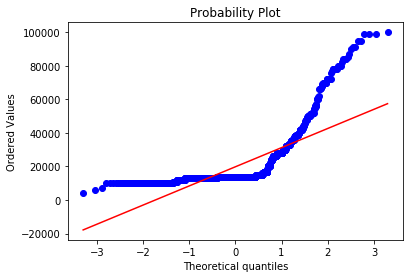

In [630]:
#histogram and normal probability plot
sns.distplot(df1['Total'], fit=norm);
fig = plt.figure()
res = stats.probplot(df1['Total'], plot=plt)

In [631]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1439 entries, 1 to 2147
Data columns (total 7 columns):
Perusahaan     1439 non-null int64
Alamat         1439 non-null int64
Wilayah        1439 non-null int64
Isi Kiriman    1439 non-null int64
SP             1439 non-null object
Biaya Kirim    1439 non-null float64
Total          1439 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 129.9+ KB


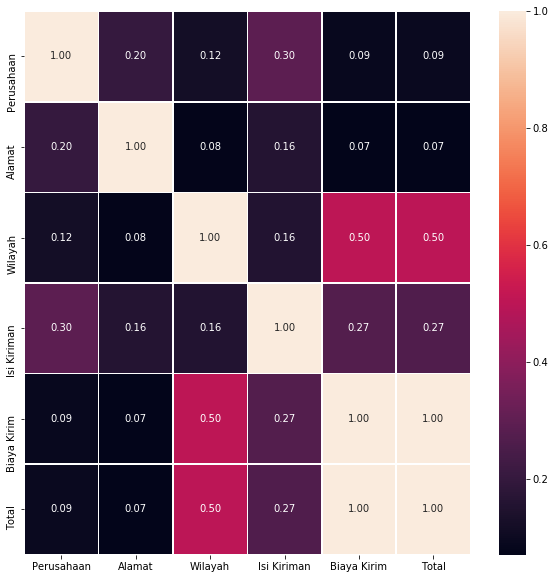

In [632]:
f,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(df1.corr(), annot=True, linewidths=0.5, fmt= '.2f',ax=ax)

In [634]:
X = df1[['Perusahaan', 'Alamat','Wilayah', 'Biaya Kirim', 'Total']]
y = df1[['Isi Kiriman']]

In [635]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, X_test.shape)

(1126, 5) (282, 5) (1126, 1) (282, 5)


In [682]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [684]:
from sklearn.naive_bayes import MultinomialNB

MNV = MultinomialNB()
MNV.fit(X_train , y_train)
y_pred = MNV.predict(X_test)
accuracy_score(y_test,y_pred)

0.42907801418439717

In [685]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.41      0.42       145
           1       0.42      0.45      0.44       137

   micro avg       0.43      0.43      0.43       282
   macro avg       0.43      0.43      0.43       282
weighted avg       0.43      0.43      0.43       282



In [686]:
from sklearn.ensemble import AdaBoostClassifier

ADA = AdaBoostClassifier()
ADA.fit(X_train,y_train)
y_pred = ADA.predict(X_test)
accuracy_score(y_test,y_pred)

0.7411347517730497

In [687]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.72      0.74       145
           1       0.72      0.76      0.74       137

   micro avg       0.74      0.74      0.74       282
   macro avg       0.74      0.74      0.74       282
weighted avg       0.74      0.74      0.74       282



In [688]:
from sklearn import svm
svm = svm.SVC(gamma='auto')
svm.fit(X_train , y_train)
y_pred = svm.predict(X_test)
accuracy_score(y_test,y_pred)

0.6843971631205674

In [689]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.51      0.62       145
           1       0.63      0.87      0.73       137

   micro avg       0.68      0.68      0.68       282
   macro avg       0.72      0.69      0.68       282
weighted avg       0.72      0.68      0.67       282



In [690]:
from sklearn.linear_model import SGDClassifier

sdg = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sdg.fit(X_train , y_train)
y_pred = sdg.predict(X_test)
accuracy_score(y_test,y_pred)

0.5141843971631206

In [691]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       145
           1       0.00      0.00      0.00       137

   micro avg       0.51      0.51      0.51       282
   macro avg       0.26      0.50      0.34       282
weighted avg       0.26      0.51      0.35       282



In [692]:
from sklearn.neighbors.nearest_centroid import NearestCentroid

NC = NearestCentroid()
NC.fit(X_train , y_train)
y_pred = NC.predict(X_test)
accuracy_score(y_test,y_pred)

0.5851063829787234

In [693]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.87      0.68       145
           1       0.67      0.28      0.40       137

   micro avg       0.59      0.59      0.59       282
   macro avg       0.62      0.58      0.54       282
weighted avg       0.62      0.59      0.55       282



In [694]:
from sklearn import tree

DT = tree.DecisionTreeClassifier()
DT.fit(X_train , y_train)
y_pred = DT.predict(X_test)
accuracy_score(y_test,y_pred)

0.7163120567375887

In [695]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       145
           1       0.73      0.66      0.69       137

   micro avg       0.72      0.72      0.72       282
   macro avg       0.72      0.71      0.71       282
weighted avg       0.72      0.72      0.72       282



In [696]:
from sklearn.ensemble import GradientBoostingClassifier

GB = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train, y_train)
GB.fit(X_train , y_train)
y_pred = GB.predict(X_test)
accuracy_score(y_test,y_pred)

0.7659574468085106

In [697]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       145
           1       0.75      0.78      0.76       137

   micro avg       0.77      0.77      0.77       282
   macro avg       0.77      0.77      0.77       282
weighted avg       0.77      0.77      0.77       282



In [678]:
from sklearn.neural_network import MLPClassifier

MLP = MLPClassifier(solver='lbfgs', alpha=1e-5,   hidden_layer_sizes=(30, 30, 30), random_state=0)
MLP.fit(X_train , y_train)
y_pred = MLP.predict(X_test)
accuracy_score(y_test,y_pred)

0.5141843971631206

In [698]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77       145
           1       0.75      0.78      0.76       137

   micro avg       0.77      0.77      0.77       282
   macro avg       0.77      0.77      0.77       282
weighted avg       0.77      0.77      0.77       282



In [699]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
RF.fit(X_train , y_train)
y_pred = RF.predict(X_test)
accuracy_score(y_test,y_pred)

0.7304964539007093

In [700]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.76      0.74       145
           1       0.73      0.70      0.72       137

   micro avg       0.73      0.73      0.73       282
   macro avg       0.73      0.73      0.73       282
weighted avg       0.73      0.73      0.73       282



In [702]:
df1.head()

,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Total
1,0,0,0,0,PERIKLANAN,13000.0,13000.0
3,0,1,1,0,PERIKLANAN,14000.0,14000.0
4,0,2,2,1,SPANDUK,14000.0,14000.0
5,0,3,2,1,PROMO,14000.0,14000.0
7,0,4,0,1,PERIKLANAN,13000.0,13000.0


In [703]:
enum(df1,'SP')

In [705]:
df1.head()

,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Total
1,0,0,0,0,0,13000.0,13000.0
3,0,1,1,0,0,14000.0,14000.0
4,0,2,2,1,1,14000.0,14000.0
5,0,3,2,1,2,14000.0,14000.0
7,0,4,0,1,0,13000.0,13000.0


In [709]:
df1.to_csv('prepo.csv', sep=',')

In [710]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1408 entries, 1 to 2147
Data columns (total 7 columns):
Perusahaan     1408 non-null int64
Alamat         1408 non-null int64
Wilayah        1408 non-null int64
Isi Kiriman    1408 non-null int64
SP             1408 non-null int64
Biaya Kirim    1408 non-null float64
Total          1408 non-null float64
dtypes: float64(2), int64(5)
memory usage: 88.0 KB


In [711]:
df1.nunique()

Perusahaan        2
Alamat         1041
Wilayah          28
Isi Kiriman       2
SP                4
Biaya Kirim      70
Total            97
dtype: int64

In [714]:
df1.tail()

,Perusahaan,Alamat,Wilayah,Isi Kiriman,SP,Biaya Kirim,Total
2142,1,1066,0,1,2,14000.0,14000.0
2143,1,1067,0,1,1,28000.0,28000.0
2144,1,1068,2,1,0,15000.0,15000.0
2146,0,282,2,0,1,15000.0,15000.0
2147,1,1069,1,0,0,15000.0,15000.0
